# TRAINING DATA
# Importing libraries and data

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math
import numpy as np
from scipy import stats

In [ ]:
df = pd.read_csv(r'C:\Users\Ravideep\Desktop\Car_price_dataset\car_detail_train.csv',sep=';')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti 800 AC,2007,90000,90000,Petrol,Individual,Manual,First Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
1,Maruti Ertiga VDI,2015,700000,50000,Diesel,Individual,Manual,First Owner,20.77 kmpl,1248 CC,88.76 bhp,200Nm@ 1750rpm,7.0
2,Hyundai Verna 1.4 CRDi,2012,400000,182000,Diesel,Individual,Manual,Second Owner,24.8 kmpl,1396 CC,88.7 bhp,219.7Nm@ 1750-2750rpm,5.0
3,Hyundai Santro Xing (Non-AC),2013,184000,15000,Petrol,Individual,Manual,First Owner,0.0 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
4,Maruti Ritz VDi,2012,335000,72072,Diesel,Dealer,Manual,First Owner,21.1 kmpl,1248 CC,73.9 bhp,113Nm@ 4500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Hyundai i20 Era 1.4 CRDi,2016,570000,56239,Diesel,Dealer,Manual,First Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0
4996,Hyundai EON Era Plus,2014,195000,65000,Petrol,Individual,Manual,Second Owner,21.1 kmpl,814 CC,55.2 bhp,74.5Nm@ 4000rpm,5.0
4997,Ford Figo Diesel EXI,2012,300000,70000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68 bhp,160Nm@ 2000rpm,5.0
4998,Maruti Alto 800 VXI,2014,235000,25000,Petrol,Individual,Manual,First Owner,22.74 kmpl,796 CC,47.3 bhp,69Nm@ 3500rpm,5.0


# Cleaning Dataset

In [ ]:
import re
p = re.compile(r'\w+-?\w+')
carnames = df['name'].apply(lambda x: re.findall(p, x)[0])
df['car_company'] = df['name'].apply(lambda x: re.findall(p, x)[0])

In [ ]:
df['car_company'].astype('category').value_counts()

Maruti           1564
Hyundai           916
Mahindra          499
Tata              472
Honda             259
Ford              257
Toyota            255
Renault           168
Chevrolet         147
Volkswagen        121
Skoda              56
Nissan             54
Datsun             44
Mercedes-Benz      38
Fiat               34
BMW                33
Audi               24
Jeep               19
Mitsubishi          8
Jaguar              6
Volvo               5
Force               3
Ambassador          3
Isuzu               3
Land                2
Daewoo              2
MG                  2
Kia                 2
Lexus               1
Opel                1
Peugeot             1
Ashok               1
Name: car_company, dtype: int64

In [ ]:
#drop name column
df = df.drop('name', axis=1)
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_company
0,2007,90000,90000,Petrol,Individual,Manual,First Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0,Maruti
1,2015,700000,50000,Diesel,Individual,Manual,First Owner,20.77 kmpl,1248 CC,88.76 bhp,200Nm@ 1750rpm,7.0,Maruti
2,2012,400000,182000,Diesel,Individual,Manual,Second Owner,24.8 kmpl,1396 CC,88.7 bhp,219.7Nm@ 1750-2750rpm,5.0,Hyundai
3,2013,184000,15000,Petrol,Individual,Manual,First Owner,0.0 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0,Hyundai
4,2012,335000,72072,Diesel,Dealer,Manual,First Owner,21.1 kmpl,1248 CC,73.9 bhp,113Nm@ 4500rpm,5.0,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2016,570000,56239,Diesel,Dealer,Manual,First Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0,Hyundai
4996,2014,195000,65000,Petrol,Individual,Manual,Second Owner,21.1 kmpl,814 CC,55.2 bhp,74.5Nm@ 4000rpm,5.0,Hyundai
4997,2012,300000,70000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68 bhp,160Nm@ 2000rpm,5.0,Ford
4998,2014,235000,25000,Petrol,Individual,Manual,First Owner,22.74 kmpl,796 CC,47.3 bhp,69Nm@ 3500rpm,5.0,Maruti


In [ ]:
df.isnull().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          149
engine           149
max_power        146
torque           150
seats            149
car_company        0
dtype: int64

In [ ]:
df['mileage'] = df['mileage'].astype(str)
df['engine'] = df['engine'].astype(str)
df['max_power'] = df['max_power'].astype(str)

df['max_power'] = df['max_power'].apply(lambda x: x.split(" ")[0])
df['engine'] = df['engine'].apply(lambda x: x.split(" ")[0])
df['mileage'] = df['mileage'].apply(lambda x: x.split(" ")[0])

df['mileage'] = df['mileage'].astype(float)
df['engine'] = df['engine'].astype(float)
df['max_power'] = pd.to_numeric(df['max_power'],errors='coerce')

df['mileage_0'] = np.where(df['mileage']==0.0,1,0)

In [ ]:
df['torque'] = df['torque'].str.lower()
df['torque'] = df['torque'].astype(str)
df['torque'] = df['torque'].apply(lambda x: x.split("nm")[0])
df['torque'] = df['torque'].apply(lambda x: x.split("/")[0])
df['torque'] = df['torque'].apply(lambda x: x.split("(")[0])
df['torque'] = df['torque'].apply(lambda x: float(x.split("kgm")[0]) * 9.80665 if "kgm" in x else x)
df['torque'] = df['torque'].astype(str)
df['torque'] = df['torque'].apply(lambda x: float(x.split("@")[0]) * 9.80665 if "@" in x else x)
df['torque'] = df['torque'].astype(float)

In [ ]:
df.isnull().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          149
engine           149
max_power        147
torque           150
seats            149
car_company        0
mileage_0          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           5000 non-null   int64  
 1   selling_price  5000 non-null   int64  
 2   km_driven      5000 non-null   int64  
 3   fuel           5000 non-null   object 
 4   seller_type    5000 non-null   object 
 5   transmission   5000 non-null   object 
 6   owner          5000 non-null   object 
 7   mileage        4851 non-null   float64
 8   engine         4851 non-null   float64
 9   max_power      4853 non-null   float64
 10  torque         4850 non-null   float64
 11  seats          4851 non-null   float64
 12  car_company    5000 non-null   object 
 13  mileage_0      5000 non-null   int32  
dtypes: float64(5), int32(1), int64(3), object(5)
memory usage: 527.5+ KB


In [ ]:
car_com = df['car_company'].unique().tolist()
car_com
df.mean()

year               2013.418000
selling_price    516451.423800
km_driven         72712.229000
mileage              19.474830
engine             1426.294991
max_power            87.664995
torque              174.131297
seats                 5.418883
mileage_0             0.002400
dtype: float64

### Filling Missing Values 

In [ ]:
for i in car_com:
    mean_val_pow  = df.loc[df['car_company']==i].mean()[5]
    mean_val_mil  = df.loc[df['car_company']==i].mean()[3]
    mean_val_eng  = df.loc[df['car_company']==i].mean()[4]
    mean_val_tor  = df.loc[df['car_company']==i].mean()[6]
    mean_val_seat  = df.loc[df['car_company']==i].mean()[7]
    df.loc[df['car_company']==i,'max_power'] = df.loc[df['car_company']==i,'max_power'].fillna(mean_val_pow)
    df.loc[df['car_company']==i,'mileage'] = df.loc[df['car_company']==i,'mileage'].fillna(mean_val_mil)
    df.loc[df['car_company']==i,'engine'] = df.loc[df['car_company']==i,'engine'].fillna(mean_val_eng)
    df.loc[df['car_company']==i,'torque'] = df.loc[df['car_company']==i,'torque'].fillna(mean_val_tor)
    df.loc[df['car_company']==i,'seats']  = df.loc[df['car_company']==i,'seats'].fillna(mean_val_seat)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           5000 non-null   int64  
 1   selling_price  5000 non-null   int64  
 2   km_driven      5000 non-null   int64  
 3   fuel           5000 non-null   object 
 4   seller_type    5000 non-null   object 
 5   transmission   5000 non-null   object 
 6   owner          5000 non-null   object 
 7   mileage        4999 non-null   float64
 8   engine         4999 non-null   float64
 9   max_power      4999 non-null   float64
 10  torque         4999 non-null   float64
 11  seats          4999 non-null   float64
 12  car_company    5000 non-null   object 
 13  mileage_0      5000 non-null   int32  
dtypes: float64(5), int32(1), int64(3), object(5)
memory usage: 527.5+ KB


In [ ]:
df.loc[df['car_company']=='Peugeot']

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_company,mileage_0
3152,1997,57000,110000,Diesel,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN,Peugeot,0


In [ ]:
df.loc[df['car_company']=='Peugeot','engine'] = 1905.0
df.loc[df['car_company']=='Peugeot','mileage'] = 17.24
df.loc[df['car_company']=='Peugeot','max_power'] = 65.0
df.loc[df['car_company']=='Peugeot','seats'] = 4.0
df.loc[df['car_company']=='Peugeot','torque'] = 119.0

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
car_company      0
mileage_0        0
dtype: int64

In [ ]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_company,mileage_0
0,2007,90000,90000,Petrol,Individual,Manual,First Owner,16.10,796.0,37.00,59.000000,4.0,Maruti,0
1,2015,700000,50000,Diesel,Individual,Manual,First Owner,20.77,1248.0,88.76,200.000000,7.0,Maruti,0
2,2012,400000,182000,Diesel,Individual,Manual,Second Owner,24.80,1396.0,88.70,219.700000,5.0,Hyundai,0
3,2013,184000,15000,Petrol,Individual,Manual,First Owner,0.00,1086.0,62.10,96.100000,5.0,Hyundai,1
4,2012,335000,72072,Diesel,Dealer,Manual,First Owner,21.10,1248.0,73.90,113.000000,5.0,Maruti,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2016,570000,56239,Diesel,Dealer,Manual,First Owner,22.54,1396.0,88.73,219.700000,5.0,Hyundai,0
4996,2014,195000,65000,Petrol,Individual,Manual,Second Owner,21.10,814.0,55.20,74.500000,5.0,Hyundai,0
4997,2012,300000,70000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.00,160.000000,5.0,Ford,0
4998,2014,235000,25000,Petrol,Individual,Manual,First Owner,22.74,796.0,47.30,69.000000,5.0,Maruti,0


In [ ]:
df.loc[df['mileage']==0.0]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_company,mileage_0
3,2013,184000,15000,Petrol,Individual,Manual,First Owner,0.0,1086.0,62.10,96.10000,5.0,Hyundai,1
519,2019,722000,80000,Diesel,Individual,Manual,First Owner,0.0,2523.0,70.00,200.00000,2.0,Mahindra,1
679,2014,574000,28080,Petrol,Dealer,Automatic,First Owner,0.0,1197.0,103.25,175.00000,5.0,Volkswagen,1
765,2017,3300000,60000,Diesel,Dealer,Automatic,First Owner,0.0,1950.0,194.00,400.00000,5.0,Mercedes-Benz,1
1094,2009,135000,28900,Petrol,Individual,Manual,Second Owner,0.0,1172.0,65.00,96.10517,5.0,Tata,1
1302,2014,575000,28100,Petrol,Dealer,Automatic,First Owner,0.0,1197.0,103.25,175.00000,5.0,Volkswagen,1
1495,2013,1650000,64788,Diesel,Dealer,Automatic,First Owner,0.0,2179.0,115.00,400.00000,5.0,Land,1
1763,2008,105000,128000,Petrol,Individual,Manual,First Owner,0.0,1086.0,62.00,96.10000,5.0,Hyundai,1
2241,2010,150000,110000,Petrol,Individual,Manual,First Owner,0.0,1086.0,62.00,96.10000,5.0,Hyundai,1
2474,2009,120000,90000,Petrol,Individual,Manual,Second Owner,0.0,1086.0,62.00,96.10000,5.0,Hyundai,1


In [ ]:
missing_mileage_list = [17.92,13,17.21,19,15.8,17.21,12.39,14,14,14,14,13]

In [ ]:
df.loc[df['mileage']==0.0,'mileage'] = missing_mileage_list

C:\Users\Ravideep\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
df.loc[df['mileage']==0.0]
df = df.drop('mileage_0',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4991 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           4991 non-null   int64  
 1   selling_price  4991 non-null   int64  
 2   km_driven      4991 non-null   int64  
 3   fuel           4991 non-null   object 
 4   seller_type    4991 non-null   object 
 5   transmission   4991 non-null   object 
 6   owner          4991 non-null   object 
 7   mileage        4991 non-null   float64
 8   engine         4991 non-null   float64
 9   max_power      4991 non-null   float64
 10  torque         4991 non-null   float64
 11  seats          4991 non-null   float64
 12  car_company    4991 non-null   object 
dtypes: float64(5), int64(3), object(5)
memory usage: 545.9+ KB


# EDA

### Price distribution plot

C:\Users\Ravideep\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


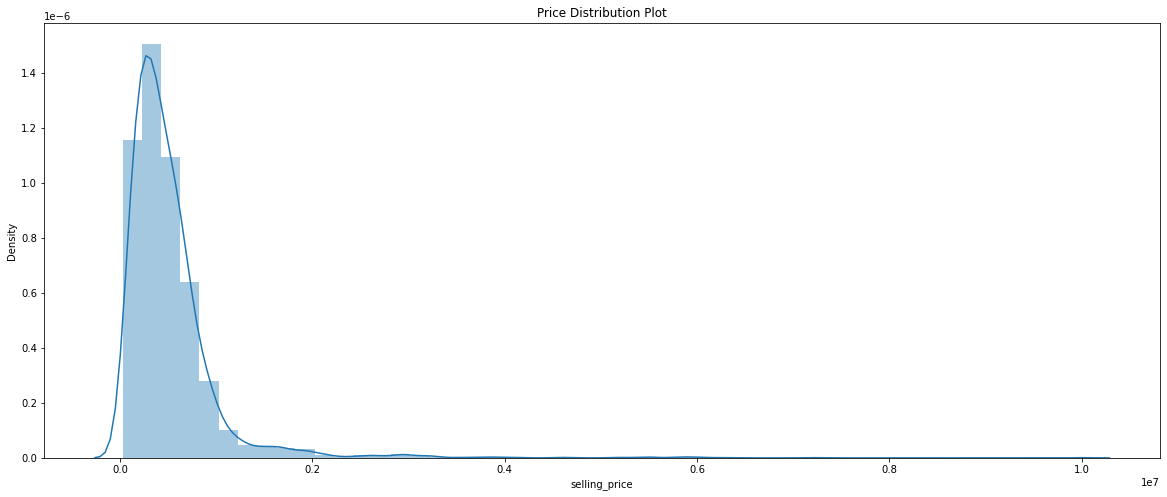

In [ ]:
plt.figure(figsize=(20,8))
plt.title('Price Distribution Plot')
sns.distplot(df.selling_price)
plt.show()

### Profiling report (Univariate analysis in report)

In [ ]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df, title="EDA" , explorative = True)
#profile.to_file("output.html")

### Bivariate Analysis

<Figure size 1800x432 with 0 Axes>

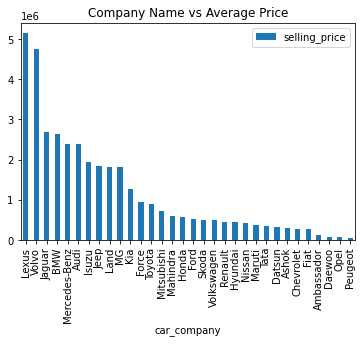

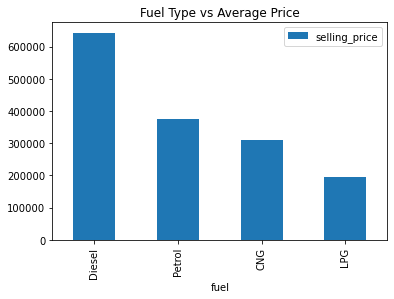

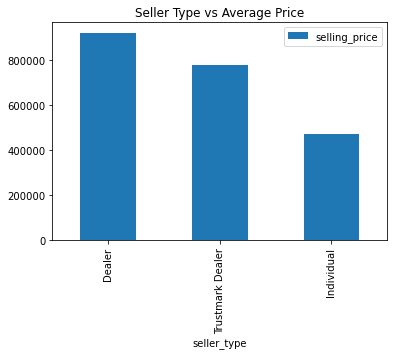

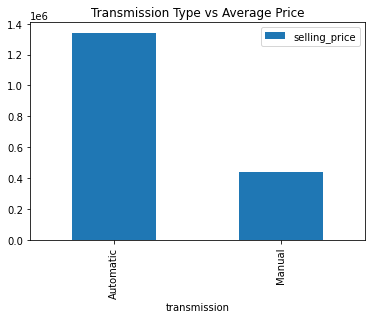

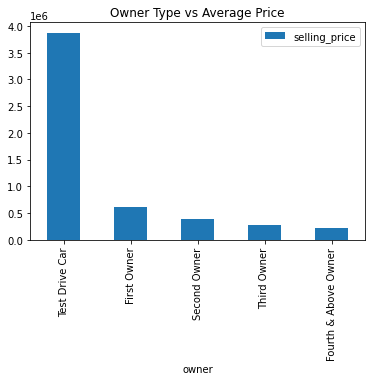

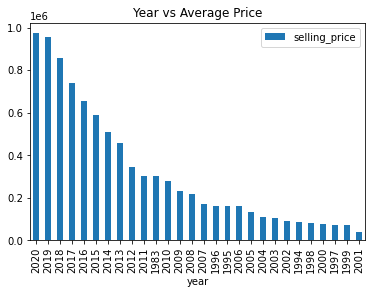

In [ ]:
#categorical vs numeric
plt.figure(figsize=(25, 6))

cvp = pd.DataFrame(df.groupby(['car_company'])['selling_price'].mean().sort_values(ascending = False))
cvp.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

fvp = pd.DataFrame(df.groupby(['fuel'])['selling_price'].mean().sort_values(ascending = False))
fvp.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

svp = pd.DataFrame(df.groupby(['seller_type'])['selling_price'].mean().sort_values(ascending = False))
svp.plot.bar()
plt.title('Seller Type vs Average Price')
plt.show()

tvp = pd.DataFrame(df.groupby(['transmission'])['selling_price'].mean().sort_values(ascending = False))
tvp.plot.bar()
plt.title('Transmission Type vs Average Price')
plt.show()

ovp = pd.DataFrame(df.groupby(['owner'])['selling_price'].mean().sort_values(ascending = False))
ovp.plot.bar()
plt.title('Owner Type vs Average Price')
plt.show()

ovp = pd.DataFrame(df.groupby(['year'])['selling_price'].mean().sort_values(ascending = False))
ovp.plot.bar()
plt.title('Year vs Average Price')
plt.show()



array([[<AxesSubplot:title={'center':'km_driven'}>]], dtype=object)

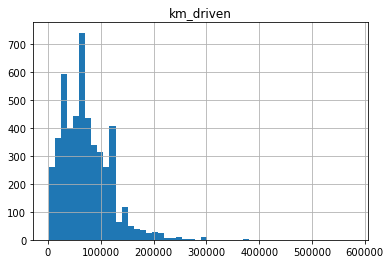

In [ ]:
df.hist(column='km_driven',bins=50)

<Figure size 1080x72 with 0 Axes>

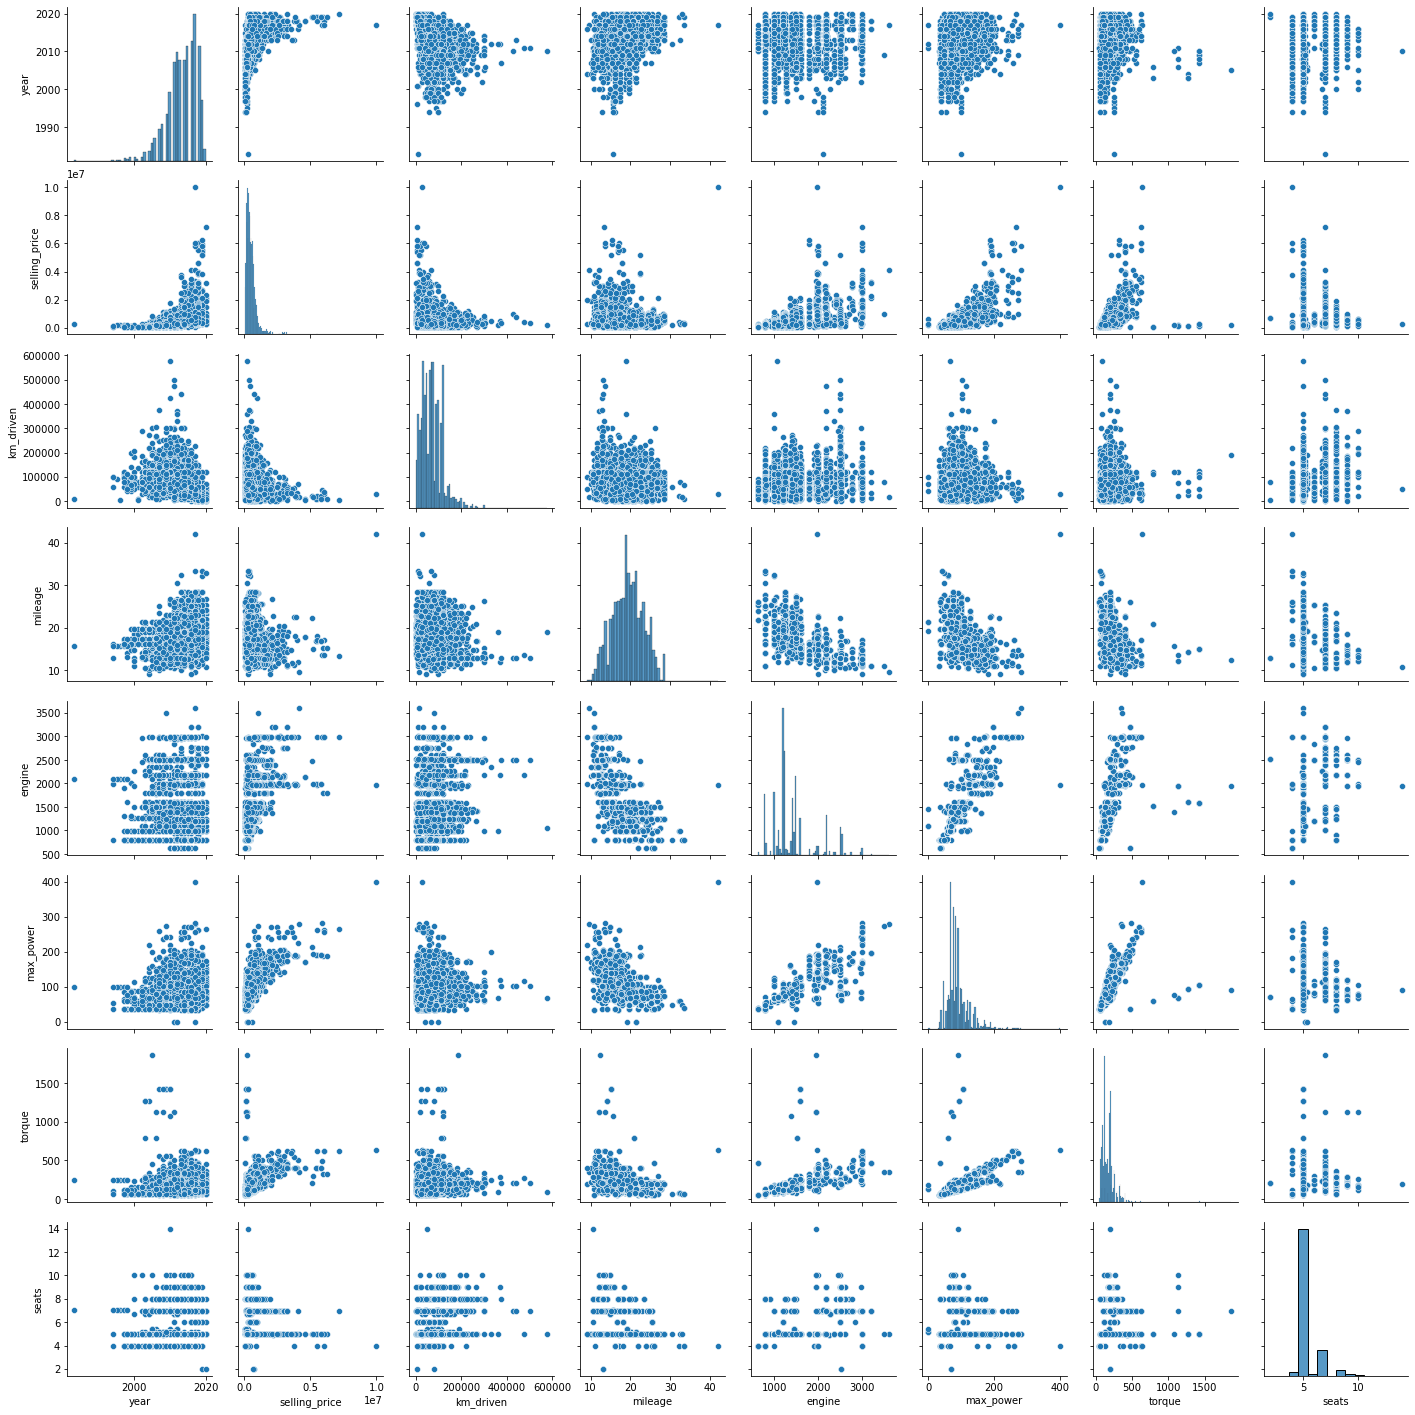

In [ ]:
# numeric vs numeric
plt.figure(figsize=(15, 1))
sns.pairplot(df)
plt.show()

In [ ]:
df.corr(method ='pearson') 

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats
year,1.000000,0.431418,-0.444088,0.356877,-0.018446,0.154596,0.051875,0.013751
selling_price,0.431418,1.000000,-0.200091,-0.102998,0.444428,0.693410,0.473379,0.150722
km_driven,-0.444088,-0.200091,1.000000,-0.237750,0.293414,0.034538,0.144300,0.250530
mileage,0.356877,-0.102998,-0.237750,1.000000,-0.593036,-0.387228,-0.246632,-0.477456
engine,-0.018446,0.444428,0.293414,-0.593036,1.000000,0.691369,0.608766,0.654236
max_power,0.154596,0.693410,0.034538,-0.387228,0.691369,1.000000,0.670957,0.258867
torque,0.051875,0.473379,0.144300,-0.246632,0.608766,0.670957,1.000000,0.315501
seats,0.013751,0.150722,0.250530,-0.477456,0.654236,0.258867,0.315501,1.000000


In [ ]:
df.corr(method ='spearman')

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats
year,1.000000,0.709196,-0.569659,0.347072,-0.024889,0.164509,0.102431,-0.021430
selling_price,0.709196,1.000000,-0.293586,0.025601,0.474218,0.616014,0.585367,0.249783
km_driven,-0.569659,-0.293586,1.000000,-0.207194,0.297343,0.050789,0.242030,0.215230
mileage,0.347072,0.025601,-0.207194,1.000000,-0.436280,-0.318329,-0.175841,-0.421713
engine,-0.024889,0.474218,0.297343,-0.436280,1.000000,0.738850,0.850216,0.507700
max_power,0.164509,0.616014,0.050789,-0.318329,0.738850,1.000000,0.795861,0.305378
torque,0.102431,0.585367,0.242030,-0.175841,0.850216,0.795861,1.000000,0.426282
seats,-0.021430,0.249783,0.215230,-0.421713,0.507700,0.305378,0.426282,1.000000


In [ ]:
#df.boxplot(column='selling_price')

In [ ]:
#def remove_outlier(col):
    #sorted(col)
    #Q1,Q3 = col.quantile([0.25,0.75])
    #IQR = Q3-Q1
    #lower_range = Q1 - (1.5*IQR)
    #upper_range = Q3 + (1.5*IQR)
    #return lower_range,upper_range

In [ ]:
#lowprice,uppprice = remove_outlier(df['selling_price'])
#df['selling_price'] = np.where(df['selling_price']>uppprice,uppprice,df['selling_price'])
#df['selling_price'] = np.where(df['selling_price']<lowprice,uppprice,df['selling_price'])

In [ ]:
#df.boxplot(column='selling_price')

In [ ]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_company
0,2007,90000,90000,Petrol,Individual,Manual,First Owner,16.10,796.0,37.00,59.000000,4.0,Maruti
1,2015,700000,50000,Diesel,Individual,Manual,First Owner,20.77,1248.0,88.76,200.000000,7.0,Maruti
2,2012,400000,182000,Diesel,Individual,Manual,Second Owner,24.80,1396.0,88.70,219.700000,5.0,Hyundai
3,2013,184000,15000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,96.100000,5.0,Hyundai
4,2012,335000,72072,Diesel,Dealer,Manual,First Owner,21.10,1248.0,73.90,113.000000,5.0,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2016,570000,56239,Diesel,Dealer,Manual,First Owner,22.54,1396.0,88.73,219.700000,5.0,Hyundai
4996,2014,195000,65000,Petrol,Individual,Manual,Second Owner,21.10,814.0,55.20,74.500000,5.0,Hyundai
4997,2012,300000,70000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.00,160.000000,5.0,Ford
4998,2014,235000,25000,Petrol,Individual,Manual,First Owner,22.74,796.0,47.30,69.000000,5.0,Maruti


In [ ]:
pd.get_dummies(df['fuel'])

,CNG,Diesel,LPG,Petrol
0,0,0,0,1
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
4995,0,1,0,0
4996,0,0,0,1
4997,0,1,0,0
4998,0,0,0,1


In [ ]:
df = pd.concat([df,pd.get_dummies(df['fuel'])],axis=1)
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_company,CNG,Diesel,LPG,Petrol
0,2007,90000,90000,Petrol,Individual,Manual,First Owner,16.10,796.0,37.00,59.000000,4.0,Maruti,0,0,0,1
1,2015,700000,50000,Diesel,Individual,Manual,First Owner,20.77,1248.0,88.76,200.000000,7.0,Maruti,0,1,0,0
2,2012,400000,182000,Diesel,Individual,Manual,Second Owner,24.80,1396.0,88.70,219.700000,5.0,Hyundai,0,1,0,0
3,2013,184000,15000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,96.100000,5.0,Hyundai,0,0,0,1
4,2012,335000,72072,Diesel,Dealer,Manual,First Owner,21.10,1248.0,73.90,113.000000,5.0,Maruti,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2016,570000,56239,Diesel,Dealer,Manual,First Owner,22.54,1396.0,88.73,219.700000,5.0,Hyundai,0,1,0,0
4996,2014,195000,65000,Petrol,Individual,Manual,Second Owner,21.10,814.0,55.20,74.500000,5.0,Hyundai,0,0,0,1
4997,2012,300000,70000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.00,160.000000,5.0,Ford,0,1,0,0
4998,2014,235000,25000,Petrol,Individual,Manual,First Owner,22.74,796.0,47.30,69.000000,5.0,Maruti,0,0,0,1


In [ ]:
df = pd.concat([df,pd.get_dummies(df['seller_type'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['transmission'])],axis=1)
df = pd.concat([df,pd.get_dummies(df['owner'])],axis=1)


In [ ]:
df = pd.concat([df,pd.get_dummies(df['car_company'])],axis=1)

In [ ]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,2007,90000,90000,Petrol,Individual,Manual,First Owner,16.10,796.0,37.00,...,0,0,0,0,0,0,0,0,0,0
1,2015,700000,50000,Diesel,Individual,Manual,First Owner,20.77,1248.0,88.76,...,0,0,0,0,0,0,0,0,0,0
2,2012,400000,182000,Diesel,Individual,Manual,Second Owner,24.80,1396.0,88.70,...,0,0,0,0,0,0,0,0,0,0
3,2013,184000,15000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,...,0,0,0,0,0,0,0,0,0,0
4,2012,335000,72072,Diesel,Dealer,Manual,First Owner,21.10,1248.0,73.90,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2016,570000,56239,Diesel,Dealer,Manual,First Owner,22.54,1396.0,88.73,...,0,0,0,0,0,0,0,0,0,0
4996,2014,195000,65000,Petrol,Individual,Manual,Second Owner,21.10,814.0,55.20,...,0,0,0,0,0,0,0,0,0,0
4997,2012,300000,70000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.00,...,0,0,0,0,0,0,0,0,0,0
4998,2014,235000,25000,Petrol,Individual,Manual,First Owner,22.74,796.0,47.30,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.drop(['fuel','seller_type','transmission','owner','car_company'],axis=1)

In [ ]:
lst = df['km_driven'].tolist()

In [ ]:
least_driven = []
less_driven = []
mod_driven = []
high_driven = []
highest_driven = []
km_driven_cat = []

In [ ]:
for i in lst:
    if i>=1000 and i<29999:
        least_driven.append(i)
    elif i>=30000 and i<49999:
        less_driven.append(i)
    elif i>=50000 and i<124999:
        mod_driven.append(i)
    elif i>=125000 and i<199999:
        high_driven.append(i)
    else:
        highest_driven.append(i)

In [ ]:
for i in lst:
    if i in least_driven:
        km_driven_cat.append("Least_driven")
    elif i in less_driven:
        km_driven_cat.append("Less_driven")
    elif i in mod_driven:
        km_driven_cat.append("Moderately_driven")
    elif i in high_driven:
        km_driven_cat.append("High_driven")
    elif i in highest_driven:
        km_driven_cat.append("Highest_driven")

In [ ]:
df.insert(54,'km_driven_cat',km_driven_cat)

In [ ]:
df.drop('km_driven',axis=1,inplace=True)

In [ ]:
df

,year,selling_price,mileage,engine,max_power,torque,seats,CNG,Diesel,LPG,...,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo,km_driven_cat
0,2007,90000,16.10,796.0,37.00,59.000000,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,Moderately_driven
1,2015,700000,20.77,1248.0,88.76,200.000000,7.0,0,1,0,...,0,0,0,0,0,0,0,0,0,Moderately_driven
2,2012,400000,24.80,1396.0,88.70,219.700000,5.0,0,1,0,...,0,0,0,0,0,0,0,0,0,High_driven
3,2013,184000,17.92,1086.0,62.10,96.100000,5.0,0,0,0,...,0,0,0,0,0,0,0,0,0,Least_driven
4,2012,335000,21.10,1248.0,73.90,113.000000,5.0,0,1,0,...,0,0,0,0,0,0,0,0,0,Moderately_driven
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2016,570000,22.54,1396.0,88.73,219.700000,5.0,0,1,0,...,0,0,0,0,0,0,0,0,0,Moderately_driven
4996,2014,195000,21.10,814.0,55.20,74.500000,5.0,0,0,0,...,0,0,0,0,0,0,0,0,0,Moderately_driven
4997,2012,300000,20.00,1399.0,68.00,160.000000,5.0,0,1,0,...,0,0,0,0,0,0,0,0,0,Moderately_driven
4998,2014,235000,22.74,796.0,47.30,69.000000,5.0,0,0,0,...,0,0,0,0,0,0,0,0,0,Least_driven


In [ ]:
df = pd.concat([df,pd.get_dummies(df['km_driven_cat'])],axis=1)
df.drop('km_driven_cat',axis=1,inplace=True)

In [ ]:
df['Age'] = 2021 - df['year']

In [ ]:
df.drop('year',axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4991 entries, 0 to 4999
Data columns (total 58 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   selling_price         4991 non-null   int64  
 1   mileage               4991 non-null   float64
 2   engine                4991 non-null   float64
 3   max_power             4991 non-null   float64
 4   torque                4991 non-null   float64
 5   seats                 4991 non-null   float64
 6   CNG                   4991 non-null   uint8  
 7   Diesel                4991 non-null   uint8  
 8   LPG                   4991 non-null   uint8  
 9   Petrol                4991 non-null   uint8  
 10  Dealer                4991 non-null   uint8  
 11  Individual            4991 non-null   uint8  
 12  Trustmark Dealer      4991 non-null   uint8  
 13  Automatic             4991 non-null   uint8  
 14  Manual                4991 non-null   uint8  
 15  First Owner          

In [ ]:
df.to_numpy().shape

(4991, 58)

# TESTING DATA

In [ ]:
df_test = pd.read_csv(r'C:\Users\Ravideep\Desktop\Car_price_dataset\car_detail_test.csv',sep=';')

In [ ]:
import re
p = re.compile(r'\w+-?\w+')
carnames = df_test['name'].apply(lambda x: re.findall(p, x)[0])
df_test['car_company'] = df_test['name'].apply(lambda x: re.findall(p, x)[0])

In [ ]:
df_test['car_company'].astype('category').value_counts()

Maruti           601
Hyundai          351
Mahindra         224
Tata             175
Ford             104
Honda            103
Toyota           102
Chevrolet         69
Volkswagen        53
Renault           38
Nissan            19
Skoda             14
BMW               14
Datsun            13
Fiat              10
Audi               9
Mercedes-Benz      8
Volvo              4
Jeep               3
Mitsubishi         3
Jaguar             2
Isuzu              1
Force              1
Kia                1
Daewoo             1
Land               1
MG                 1
Ambassador         1
Name: car_company, dtype: int64

In [ ]:
#drop name column
df_test = df_test.drop('name', axis=1)
df_test

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_company
0,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda
1,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai
2,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0,Toyota
3,2009,180000,90000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,1061 CC,67 bhp,84Nm@ 3500rpm,5.0,Maruti
4,2016,778000,70000,Diesel,Individual,Manual,Second Owner,24.52 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,7.0,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,2019,1575000,20000,Diesel,Individual,Automatic,First Owner,17.8 kmpl,1493 CC,113.4 bhp,250nm@ 1500-2750rpm,5.0,Kia
1922,2017,425000,12000,Petrol,Individual,Manual,First Owner,23.1 kmpl,998 CC,67.04 bhp,90Nm@ 3500rpm,5.0,Maruti
1923,2017,360000,80000,Petrol,Individual,Manual,First Owner,20.51 kmpl,998 CC,67.04 bhp,90Nm@ 3500rpm,5.0,Maruti
1924,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0,Hyundai


In [ ]:
df_test.isnull().sum()

year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          59
engine           59
max_power        59
torque           59
seats            59
car_company       0
dtype: int64

In [ ]:
df_test['mileage'] = df_test['mileage'].astype(str)
df_test['engine'] = df_test['engine'].astype(str)
df_test['max_power'] = df_test['max_power'].astype(str)

df_test['max_power'] = df_test['max_power'].apply(lambda x: x.split(" ")[0])
df_test['engine'] = df_test['engine'].apply(lambda x: x.split(" ")[0])
df_test['mileage'] = df_test['mileage'].apply(lambda x: x.split(" ")[0])

df_test['mileage'] = df_test['mileage'].astype(float)
df_test['engine'] = df_test['engine'].astype(float)
df_test['max_power'] = pd.to_numeric(df_test['max_power'],errors='coerce')


In [ ]:
df_test['torque'] = df_test['torque'].str.lower()
df_test['torque'] = df_test['torque'].astype(str)
df_test['torque'] = df_test['torque'].apply(lambda x: x.split("nm")[0])
df_test['torque'] = df_test['torque'].apply(lambda x: x.split("/")[0])
df_test['torque'] = df_test['torque'].apply(lambda x: x.split("(")[0])
df_test['torque'] = df_test['torque'].apply(lambda x: float(x.split("kgm")[0]) * 9.80665 if "kgm" in x else x)
df_test['torque'] = df_test['torque'].astype(str)
df_test['torque'] = df_test['torque'].apply(lambda x: float(x.split("@")[0]) * 9.80665 if "@" in x else x)
df_test['torque'] = df_test['torque'].astype(float)

In [ ]:
car_com = df_test['car_company'].unique().tolist()
car_com
df_test.mean()

year               2013.426272
selling_price    519397.507788
km_driven         77327.575286
mileage              19.440573
engine             1442.833958
max_power            87.887882
torque              180.159645
seats                 5.475629
dtype: float64

In [ ]:
for i in car_com:
    mean_val_pow  = df_test.loc[df_test['car_company']==i].mean()[5]
    mean_val_mil  = df_test.loc[df_test['car_company']==i].mean()[3]
    mean_val_eng  = df_test.loc[df_test['car_company']==i].mean()[4]
    mean_val_tor  = df_test.loc[df_test['car_company']==i].mean()[6]
    mean_val_seat  = df_test.loc[df_test['car_company']==i].mean()[7]
    df_test.loc[df_test['car_company']==i,'max_power'] = df_test.loc[df_test['car_company']==i,'max_power'].fillna(mean_val_pow)
    df_test.loc[df_test['car_company']==i,'mileage'] = df_test.loc[df_test['car_company']==i,'mileage'].fillna(mean_val_mil)
    df_test.loc[df_test['car_company']==i,'engine'] = df_test.loc[df_test['car_company']==i,'engine'].fillna(mean_val_eng)
    df_test.loc[df_test['car_company']==i,'torque'] = df_test.loc[df_test['car_company']==i,'torque'].fillna(mean_val_tor)
    df_test.loc[df_test['car_company']==i,'seats']  = df_test.loc[df_test['car_company']==i,'seats'].fillna(mean_val_seat)

In [ ]:
df_test = df_test.drop_duplicates()

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 0 to 1925
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           1925 non-null   int64  
 1   selling_price  1925 non-null   int64  
 2   km_driven      1925 non-null   int64  
 3   fuel           1925 non-null   object 
 4   seller_type    1925 non-null   object 
 5   transmission   1925 non-null   object 
 6   owner          1925 non-null   object 
 7   mileage        1925 non-null   float64
 8   engine         1925 non-null   float64
 9   max_power      1925 non-null   float64
 10  torque         1925 non-null   float64
 11  seats          1925 non-null   float64
 12  car_company    1925 non-null   object 
dtypes: float64(5), int64(3), object(5)
memory usage: 210.5+ KB


In [ ]:
df_test

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_company
0,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,124.544455,5.0,Honda
1,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.668960,5.0,Hyundai
2,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.10,170.000000,5.0,Toyota
3,2009,180000,90000,Petrol,Individual,Manual,Second Owner,18.90,1061.0,67.00,84.000000,5.0,Maruti
4,2016,778000,70000,Diesel,Individual,Manual,Second Owner,24.52,1248.0,88.50,200.000000,7.0,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,2019,1575000,20000,Diesel,Individual,Automatic,First Owner,17.80,1493.0,113.40,250.000000,5.0,Kia
1922,2017,425000,12000,Petrol,Individual,Manual,First Owner,23.10,998.0,67.04,90.000000,5.0,Maruti
1923,2017,360000,80000,Petrol,Individual,Manual,First Owner,20.51,998.0,67.04,90.000000,5.0,Maruti
1924,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,219.700000,5.0,Hyundai


In [ ]:
df_test.loc[df_test['mileage']==0.0]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car_company
409,2011,1700000,110000,Diesel,Individual,Automatic,Third Owner,0.0,2987.0,165.0,5001.3915,5.0,Mercedes-Benz
593,2010,110000,80000,Petrol,Individual,Manual,Second Owner,0.0,1086.0,62.1,96.1000,5.0,Hyundai
1266,2008,175000,40000,Petrol,Individual,Manual,First Owner,0.0,1086.0,62.0,96.1000,5.0,Hyundai


In [ ]:
missing_mileage_list = [10,17.92,14]
df_test.loc[df_test['mileage']==0.0,'mileage'] = missing_mileage_list

C:\Users\Ravideep\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 0 to 1925
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           1925 non-null   int64  
 1   selling_price  1925 non-null   int64  
 2   km_driven      1925 non-null   int64  
 3   fuel           1925 non-null   object 
 4   seller_type    1925 non-null   object 
 5   transmission   1925 non-null   object 
 6   owner          1925 non-null   object 
 7   mileage        1925 non-null   float64
 8   engine         1925 non-null   float64
 9   max_power      1925 non-null   float64
 10  torque         1925 non-null   float64
 11  seats          1925 non-null   float64
 12  car_company    1925 non-null   object 
dtypes: float64(5), int64(3), object(5)
memory usage: 210.5+ KB


In [ ]:
df_test = pd.concat([df_test,pd.get_dummies(df_test['fuel'])],axis=1)
df_test = pd.concat([df_test,pd.get_dummies(df_test['seller_type'])],axis=1)
df_test = pd.concat([df_test,pd.get_dummies(df_test['transmission'])],axis=1)
df_test = pd.concat([df_test,pd.get_dummies(df_test['owner'])],axis=1)
df_test = pd.concat([df_test,pd.get_dummies(df_test['car_company'])],axis=1)

In [ ]:
df_test = df_test.drop(['fuel','seller_type','transmission','owner','car_company'],axis=1)

In [ ]:
df_test

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,CNG,Diesel,...,Maruti,Mercedes-Benz,Mitsubishi,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,2006,158000,140000,17.70,1497.0,78.00,124.544455,5.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2010,225000,127000,23.00,1396.0,90.00,219.668960,5.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2011,350000,90000,23.59,1364.0,67.10,170.000000,5.0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,2009,180000,90000,18.90,1061.0,67.00,84.000000,5.0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2016,778000,70000,24.52,1248.0,88.50,200.000000,7.0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,2019,1575000,20000,17.80,1493.0,113.40,250.000000,5.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1922,2017,425000,12000,23.10,998.0,67.04,90.000000,5.0,0,0,...,1,0,0,0,0,0,0,0,0,0
1923,2017,360000,80000,20.51,998.0,67.04,90.000000,5.0,0,0,...,1,0,0,0,0,0,0,0,0,0
1924,2014,475000,80000,22.54,1396.0,88.73,219.700000,5.0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 0 to 1925
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  1925 non-null   int64  
 1   selling_price         1925 non-null   int64  
 2   km_driven             1925 non-null   int64  
 3   mileage               1925 non-null   float64
 4   engine                1925 non-null   float64
 5   max_power             1925 non-null   float64
 6   torque                1925 non-null   float64
 7   seats                 1925 non-null   float64
 8   CNG                   1925 non-null   uint8  
 9   Diesel                1925 non-null   uint8  
 10  LPG                   1925 non-null   uint8  
 11  Petrol                1925 non-null   uint8  
 12  Dealer                1925 non-null   uint8  
 13  Individual            1925 non-null   uint8  
 14  Trustmark Dealer      1925 non-null   uint8  
 15  Automatic            

In [ ]:
tmp = np.zeros(1925)

In [ ]:
df_test.insert(23, 'Ashok', tmp)
df_test.insert(39, 'Lexus', tmp)
df_test.insert(46, 'Opel', tmp)
df_test.insert(47, 'Peugeot', tmp)
df_test[['Ashok','Lexus','Opel','Peugeot']] = df_test[['Ashok','Lexus','Opel','Peugeot']].astype('uint8')

In [ ]:
df_test

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,CNG,Diesel,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,2006,158000,140000,17.70,1497.0,78.00,124.544455,5.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2010,225000,127000,23.00,1396.0,90.00,219.668960,5.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2011,350000,90000,23.59,1364.0,67.10,170.000000,5.0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,2009,180000,90000,18.90,1061.0,67.00,84.000000,5.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016,778000,70000,24.52,1248.0,88.50,200.000000,7.0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,2019,1575000,20000,17.80,1493.0,113.40,250.000000,5.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1922,2017,425000,12000,23.10,998.0,67.04,90.000000,5.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1923,2017,360000,80000,20.51,998.0,67.04,90.000000,5.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1924,2014,475000,80000,22.54,1396.0,88.73,219.700000,5.0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
lst = df_test['km_driven'].tolist()

In [ ]:
least_driven = []
less_driven = []
mod_driven = []
high_driven = []
highest_driven = []
km_driven_cat = []
for i in lst:
    if i>=1000 and i<29999:
        least_driven.append(i)
    elif i>=30000 and i<49999:
        less_driven.append(i)
    elif i>=50000 and i<124999:
        mod_driven.append(i)
    elif i>=125000 and i<199999:
        high_driven.append(i)
    else:
        highest_driven.append(i)

In [ ]:
for i in lst:
    if i in least_driven:
        km_driven_cat.append("Least_driven")
    elif i in less_driven:
        km_driven_cat.append("Less_driven")
    elif i in mod_driven:
        km_driven_cat.append("Moderately_driven")
    elif i in high_driven:
        km_driven_cat.append("High_driven")
    elif i in highest_driven:
        km_driven_cat.append("Highest_driven")

In [ ]:
df_test.insert(54,'km_driven_cat',km_driven_cat)
df_test = pd.concat([df_test,pd.get_dummies(df_test['km_driven_cat'])],axis=1)

In [ ]:
df_test.drop('km_driven_cat',axis=1,inplace = True)

In [ ]:
df_test.drop('km_driven',axis=1,inplace = True)

In [ ]:
df_test['Age'] = 2021 - df_test['year']
df_test.drop('year',axis=1,inplace=True)

In [ ]:
df

,selling_price,mileage,engine,max_power,torque,seats,CNG,Diesel,LPG,Petrol,...,Tata,Toyota,Volkswagen,Volvo,High_driven,Highest_driven,Least_driven,Less_driven,Moderately_driven,Age
0,90000,16.10,796.0,37.00,59.000000,4.0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,14
1,700000,20.77,1248.0,88.76,200.000000,7.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,6
2,400000,24.80,1396.0,88.70,219.700000,5.0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,9
3,184000,17.92,1086.0,62.10,96.100000,5.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,8
4,335000,21.10,1248.0,73.90,113.000000,5.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,570000,22.54,1396.0,88.73,219.700000,5.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,5
4996,195000,21.10,814.0,55.20,74.500000,5.0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,7
4997,300000,20.00,1399.0,68.00,160.000000,5.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,9
4998,235000,22.74,796.0,47.30,69.000000,5.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,7


In [ ]:
df['selling_price'] = np.log(df['selling_price'])
df_test['selling_price'] = np.log(df_test['selling_price'])
#df.drop('mileage',axis=1,inplace=True)
#df_test.drop('mileage',axis=1,inplace=True)

In [ ]:
df.to_numpy()

array([[1.14075649e+01, 1.61000000e+01, 7.96000000e+02, ...,
        0.00000000e+00, 1.00000000e+00, 1.40000000e+01],
       [1.34588356e+01, 2.07700000e+01, 1.24800000e+03, ...,
        0.00000000e+00, 1.00000000e+00, 6.00000000e+00],
       [1.28992198e+01, 2.48000000e+01, 1.39600000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 9.00000000e+00],
       ...,
       [1.26115378e+01, 2.00000000e+01, 1.39900000e+03, ...,
        0.00000000e+00, 1.00000000e+00, 9.00000000e+00],
       [1.23673408e+01, 2.27400000e+01, 7.96000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 7.00000000e+00],
       [1.22060726e+01, 1.77000000e+01, 1.49700000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 1.50000000e+01]])

In [ ]:
X_train = df.loc[:, df.columns != 'selling_price']
x = df.loc[:, df.columns != 'selling_price']

In [ ]:
y_train = df.loc[:, df.columns == 'selling_price']

In [ ]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [ ]:
y_train.shape = (4991,)

In [ ]:
X_test = df_test.loc[:, df_test.columns != 'selling_price']

In [ ]:
y_test = df_test.loc[:, df_test.columns == 'selling_price']

In [ ]:
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()
y_test.shape = (1925,)

In [ ]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(4991, 57) (4991,)
(1925, 57) (1925,)


###  Random Forest Model

In [ ]:
n_estimators = [500,800,1000,1500,2500]
max_features = ['auto','sqrt','log2']
max_depth = [10,20,30,40,50]
max_depth.append(None)
min_samples_split = [2,5,10,15,20]
min_samples_leaf = [1,2,5,10,15]

In [ ]:
grid_param={
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [ ]:
#from sklearn.model_selection import RandomizedSearchCV
#RFR = RandomForestRegressor(random_state=1)
#RFR_random = RandomizedSearchCV(estimator = RFR,
                               #param_distributions = grid_param,
                               #n_iter = 500,
                               #cv = 5,
                               #verbose = 2,
                               #random_state = 42,
                               #n_jobs = -1)

In [ ]:
#RFR_random.fit(X_train,y_train)
#print(RFR_random.best_params_)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE
import sklearn.metrics as sm
regressor = RandomForestRegressor(n_estimators=1500, random_state=0, min_samples_split = 5, max_depth = 20, min_samples_leaf = 1, max_features='auto')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print("R2 score:", round(sm.r2_score(y_test, y_pred),2))

Mean Absolute Error: 0.17
Mean Squared Error: 0.06
Root Mean Squared Error: 0.24
R2 score: 0.9


In [ ]:
print("error: ",np.mean(abs((y_test - y_pred)/y_test)))

error:  0.013193426185101003


In [ ]:
print('Score on Training set:', regressor.score(X_train,y_train))
print('Score on Test set:', regressor.score(X_test,y_test))

Score on Training set: 0.9725754492817272
Score on Test set: 0.8969923610460673


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X_train,y_train)

ExtraTreesRegressor()

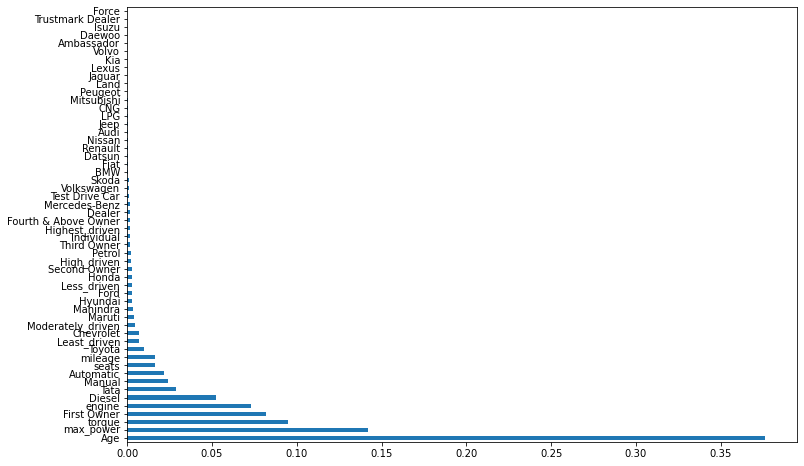

In [ ]:
plt.figure(figsize=(12,8))
feature_imp = pd.Series(selection.feature_importances_, index = x.columns)
feature_imp.nlargest(54).plot(kind='barh')
plt.show()

In [ ]:
print(y_test)
print(np.amin(y_test))
print(np.amax(y_test))
print(np.mean(y_test))
print(np.var(y_test))
print(np.std(y_test))

[11.97035031 12.32385568 12.76568843 ... 12.79385931 13.07107008
 12.67607627]
10.414843035901725
15.690844950778233
12.879219875506662
0.5718218201405544
0.7561890108567794


In [ ]:
print(y_pred)
print(np.amin(y_pred))
print(np.amax(y_pred))
print(np.mean(y_pred))
print(np.var(y_pred))
print(np.std(y_pred))

[12.08749035 12.73448093 12.68900558 ... 12.88934584 13.08191053
 12.85038672]
10.59983179572891
15.587225605494874
12.872764706556568
0.5340543804624205
0.730790243819949


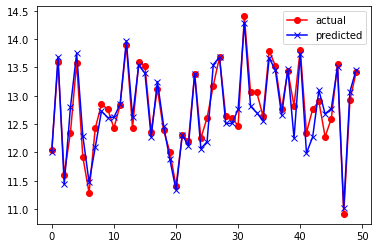

In [ ]:
import random
num_sample = 50
idx = random.sample(range(len(y_test)),num_sample)
plt.plot(range(num_sample),y_test[idx],'ro-')
plt.plot(range(num_sample),y_pred[idx],'bx-')
plt.legend(['actual','predicted'])